In [1]:
import platform

print(f"Python version: {platform.python_version()}")
assert platform.python_version_tuple() >= ("3", "6")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Setup plots
%matplotlib inline
plt.rcParams["figure.figsize"] = 10, 8
%config InlineBackend.figure_format = 'retina'
sns.set()

Python version: 3.8.5


# Kmeans

In [2]:
from pyfit.kmeans import KMeans

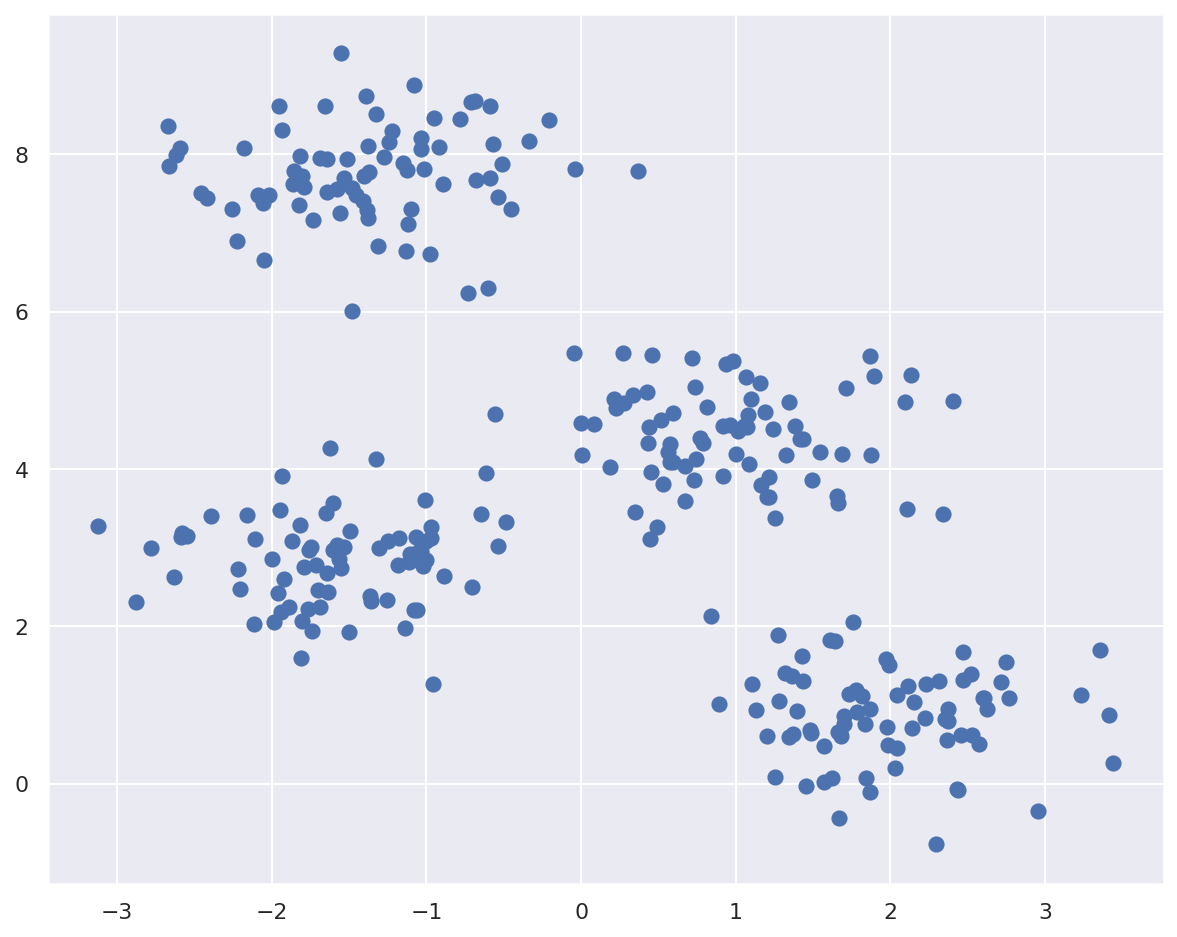

In [3]:
# dataset generation
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

nb iterations : 100


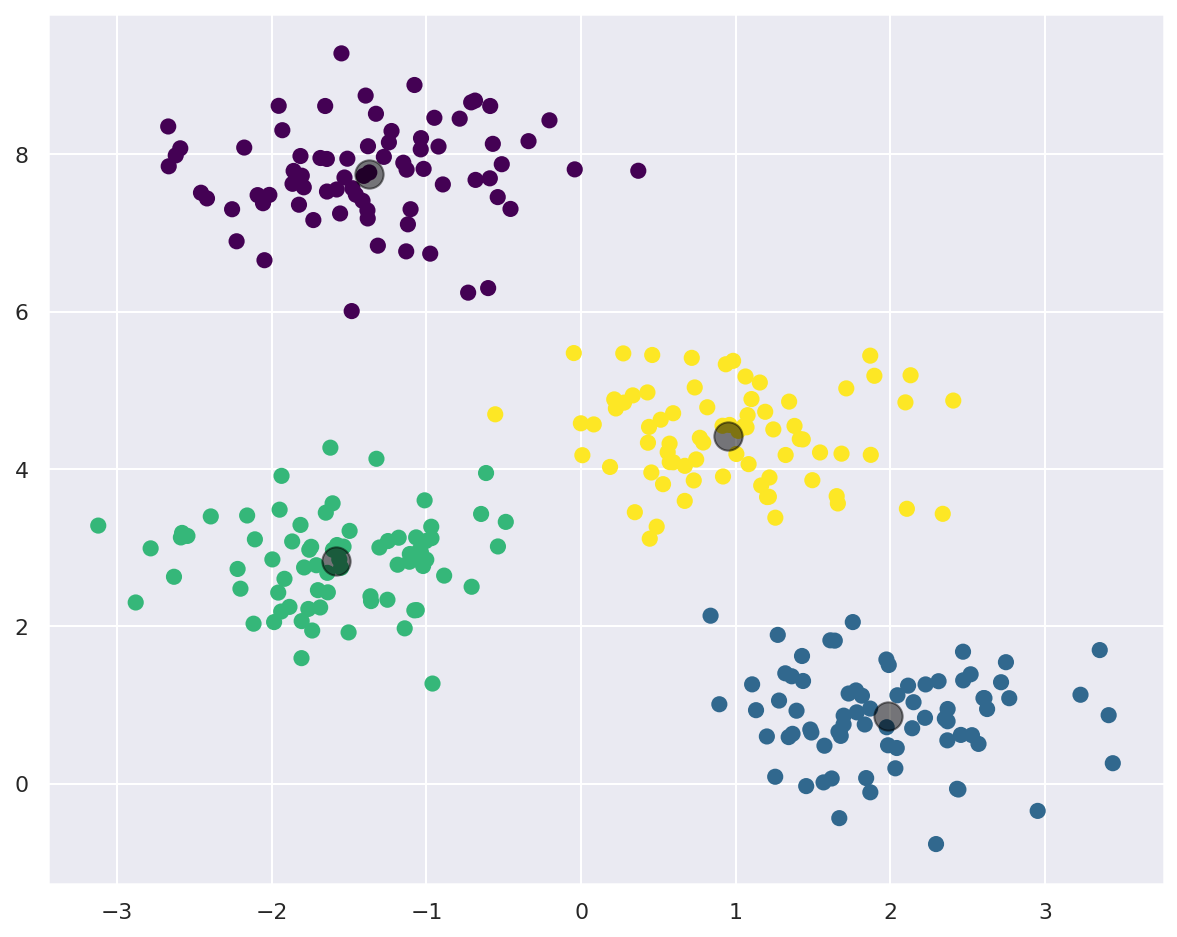

In [4]:
# Apply kmeans
kmeans = KMeans(n_clusters = 4).fit(X)
centers, labels = kmeans.centers_, kmeans.labels_

#plot the labels
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

#plot the centers
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

# Decision Tree Classifier

In [5]:
from pyfit.decisionTreeClassifier import DecisionTreeClassifier
from pyfit.metrics import accuracy_score
from sklearn.datasets import load_iris, load_breast_cancer

In [6]:
breast_cancer = load_breast_cancer()
x_train = breast_cancer.data
y_train = breast_cancer.target

dt_model = DecisionTreeClassifier(criterion='gini', max_depth=2)
dt_model.fit(x_train, y_train)

y_pred = [dt_model.predict(x) for x in x_train]
print(y_train[:10])
print(y_pred[:10])
acc = accuracy_score(y_train, y_pred)
print(f"Training accuracy: {acc:.5f}")

impurity: 0.46753006075469244
impurity: 0.018516901039392186
impurity: 0.019702482611816396
impurity: 0.48323745288633213
impurity: 0.1284185493460166
impurity: 0.42503599405956316
[0 0 0 0 0 0 0 0 0 0]
[0, 1, 0, 0, 0, 0, 0, 1, 0, 0]
Training accuracy: 0.88401


/home/shurean/Documents/cours/semestre_9/projet_semestriel/pyfit-ultime/pyfit/decisionTreeClassifier.py:64: RuntimeWarning: invalid value encountered in true_divide
  np.prod(class_above, axis=0) / (above_total ** n_class)


In [7]:
# Load the Iris dataset
iris = load_iris()

# Put it into a DataFrame for visualization purposes
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
# Add target and class columns to DataFrame
df_iris["target"] = iris.target
df_iris["class"] = iris.target_names[iris.target]
# Show 10 random samples
df_iris.sample(n=5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class
43,5.0,3.5,1.6,0.6,0,setosa
100,6.3,3.3,6.0,2.5,2,virginica
18,5.7,3.8,1.7,0.3,0,setosa
80,5.5,2.4,3.8,1.1,1,versicolor
69,5.6,2.5,3.9,1.1,1,versicolor


In [8]:
x_train = iris.data
y_train = iris.target

print(f"x_train: {x_train.shape}")
print(f"y_train: {y_train.shape}")

x_train: (150, 4)
y_train: (150,)


In [9]:
# Train a DT on thedataset
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=10)
dt_model.fit(x_train, y_train)

impurity: 0.6666666666666665
impurity: 0.5723423954212608
impurity: 0.5190311418685122
impurity: 0.5
impurity: 0.49382716049382713
impurity: 0.4844290657439447
impurity: 0.43060361399461744
impurity: 0.48753462603878117
impurity: 0.21875


/home/shurean/Documents/cours/semestre_9/projet_semestriel/pyfit-ultime/pyfit/decisionTreeClassifier.py:64: RuntimeWarning: invalid value encountered in true_divide
  np.prod(class_above, axis=0) / (above_total ** n_class)


Exception: node without data, x is empty

In [ ]:
# Compute accuracy on training set
y_pred = [dt_model.predict(x) for x in x_train]
print(y_train)
print(y_pred)
acc = accuracy_score(y_train, y_pred)
print(f"Training accuracy: {acc:.5f}")